# <div style="text-align: center;"> LAB 5<div>

### Introduction

This Jupyter Lab research paper code is aimed at conducting data analysis and regression modeling on a dataset. The dataset appears to contain economic and demographic information. The code is divided into several sections, each serving a specific purpose.

## <div style="text-align: center;"> Data Preparation and Visualization <div>

### Data Import and Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wbdata
from matplotlib.ticker import MultipleLocator
import seaborn as sns
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec
from IPython.display import Image
from sklearn.linear_model import LinearRegression

These lines import necessary libraries for data manipulation, visualization, and machine learning.

## <div style="text-align: center;"> Data Preparation</div>

In [2]:
class Config:
    indicators = {
        'NY.GDP.MKTP.KD': 'GDP',
        'NE.GDI.FTOT.KD': 'Gross Capital Formation',
        'SL.TLF.TOTL.IN': 'Total Employment',}
    country_code = 'BY'
    output_filename_first_anim = 'anim1.gif'
    output_filename_second_anim = 'anim2.gif'
    num_folds = 30
    arr = np.arange(1, 31)

Using the `wbdata` library we get the necessary data for the desired country.

In [3]:
data = wbdata.get_dataframe(Config.indicators, country=Config.country_code)
df = data.iloc[:33]

## <div style="text-align: center;"> Data Analysis and Visualization </div>

Function `load_and_explore_data` includes:
<ol style="list-style-type: square; padding-left: 20px; margin-bottom: 20px;">
    <li>Information about dataframe</li>
    <li>Summary statistics</li>
    <li>Correlation matrix</li>
</ol>

<class 'wbdata.api.WBDataFrame'>
Index: 33 entries, 2022 to 1990
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GDP                      33 non-null     float64
 1   Gross Capital Formation  33 non-null     float64
 2   Total Employment         33 non-null     float64
dtypes: float64(3)
memory usage: 1.0+ KB
None
               GDP  Gross Capital Formation  Total Employment
date                                                         
2022  5.725185e+10             1.156466e+10         4833522.0
2021  6.007379e+10             1.401072e+10         4892246.0
2020  5.864355e+10             1.489719e+10         4931564.0
2019  5.904084e+10             1.589709e+10         4971033.0
2018  5.819916e+10             1.497561e+10         4998649.0
2017  5.642207e+10             1.459703e+10         5025143.0
2016  5.502894e+10             1.383100e+10         5038419.0
2015  5.645490e+10           

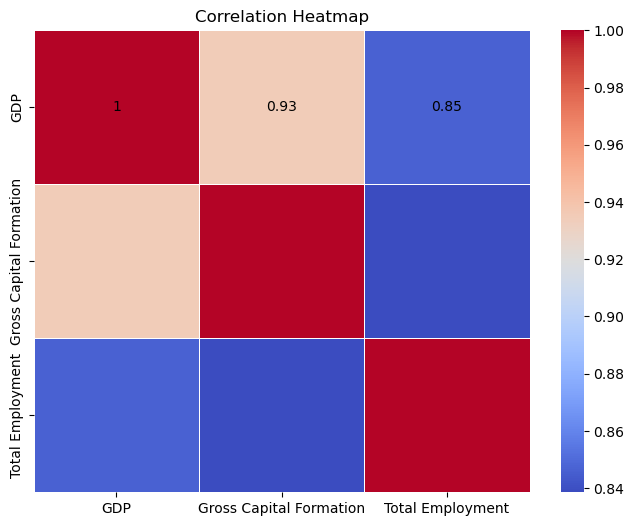

In [4]:
def load_and_explore_data(df):
    print(df.info())
    print(df.head(30))
    print(df.describe())

    correlation_matrix = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, cbar=True, annot_kws={"size": 10, "color": 'black'})
    plt.title('Correlation Heatmap')
    plt.show()

load_and_explore_data(df)

### 3D Analysis

To create a 3D animation for data analysis, several key actions are taken:

- **Define an Initial Figure Function**: Start by defining a function that creates the initial figure, setting up the plot's structure and properties.

- **Create an Update Function**: Next, create an update function responsible for updating the animation frames. This function will modify the data or plot properties at each frame to create the animation effect.

- **Save the Animation**: Finally, once the animation is created and configured, save it to a suitable format, such as a video file or an animated GIF, so that it can be easily shared and used for further analysis.

These steps provide a structured approach to building 3D animations for effective data analysis.

In [5]:
%%capture --no-stdout
def makeFigure():
    fig = plt.figure(figsize=(12, 10))
    gs = GridSpec(3, 1, height_ratios=[1, 1, 2], hspace=0.3)

    ax = fig.add_subplot(gs[2, 0], projection='3d')
    ax2 = fig.add_subplot(gs[1, 0])
    ax3 = fig.add_subplot(gs[0, 0])
    
    ax3.set(yscale='log')

    line, = ax.plot(df['GDP'], df['Gross Capital Formation'], df.index.tolist()[::-1], color='b', linewidth=2)
    
    ax2_line_exports, = ax2.plot(df.index.tolist()[::-1], df['Total Employment'], label='Employment', marker='o', linestyle='-', color='b')
    
    ax3_line_imports, = ax3.plot(df.index.tolist()[::-1], df['Gross Capital Formation'], label='Gross Capital Formation', marker='s', linestyle='--', color='r')
    ax3_line_gdp, = ax3.plot(df.index.tolist()[::-1], df['GDP'], label='GDP', marker='x', linestyle='dashed', color='g')
    ax3.set_ylabel('Values', fontsize=12)
    ax3.set_title('Gross Capital Formation and GDP Over Time', fontsize=16)
    ax3.xaxis.set_major_locator(MultipleLocator(base=5))
    ax3.legend()
    
    ax2.set_ylabel('Values', fontsize=12)
    ax2.set_title('Exports', fontsize=16)
    ax2.xaxis.set_major_locator(MultipleLocator(base=5))
    ax2.legend()

    ax.set_title('GDP vs Gross Capital Formation', fontsize=16)
    ax.set_xlabel('GDP', fontsize=12)
    ax.set_ylabel('Gross Capital Formation', fontsize=12)
    ax.set_zlabel('Year', fontsize=12, rotation=90)

    ax.set(yscale='linear')
    
    return fig, ax, line, ax3, ax2_line_exports, ax3_line_imports, ax3_line_gdp

figcomps = makeFigure()

def update(frame, line, ax3, ax2_line_exports, ax3_line_imports, ax3_line_gdp):
    line.set_data(df['GDP'][:frame], df['Gross Capital Formation'][:frame])
    line.set_3d_properties(df.index.tolist()[::-1][:frame])
    ax2_line_exports.set_data(df.index.tolist()[::-1][:frame], df['Total Employment'][:frame])
    ax3_line_imports.set_data(df.index.tolist()[::-1][:frame], df['Gross Capital Formation'][:frame])
    ax3_line_gdp.set_data(df.index.tolist()[::-1][:frame], df['GDP'][:frame])

    return line, ax2_line_exports, ax3_line_imports, ax3_line_gdp

anim = FuncAnimation(figcomps[0], update, fargs=(figcomps[2], figcomps[3], figcomps[4], figcomps[5], figcomps[6]), frames=len(df.index.tolist()) + 1, interval=500, blit=True,repeat=False, cache_frame_data=False)

_ = anim

anim.save(Config.output_filename_first_anim, writer='pillow', fps=60)

NameError: name 'MultipleLocator' is not defined

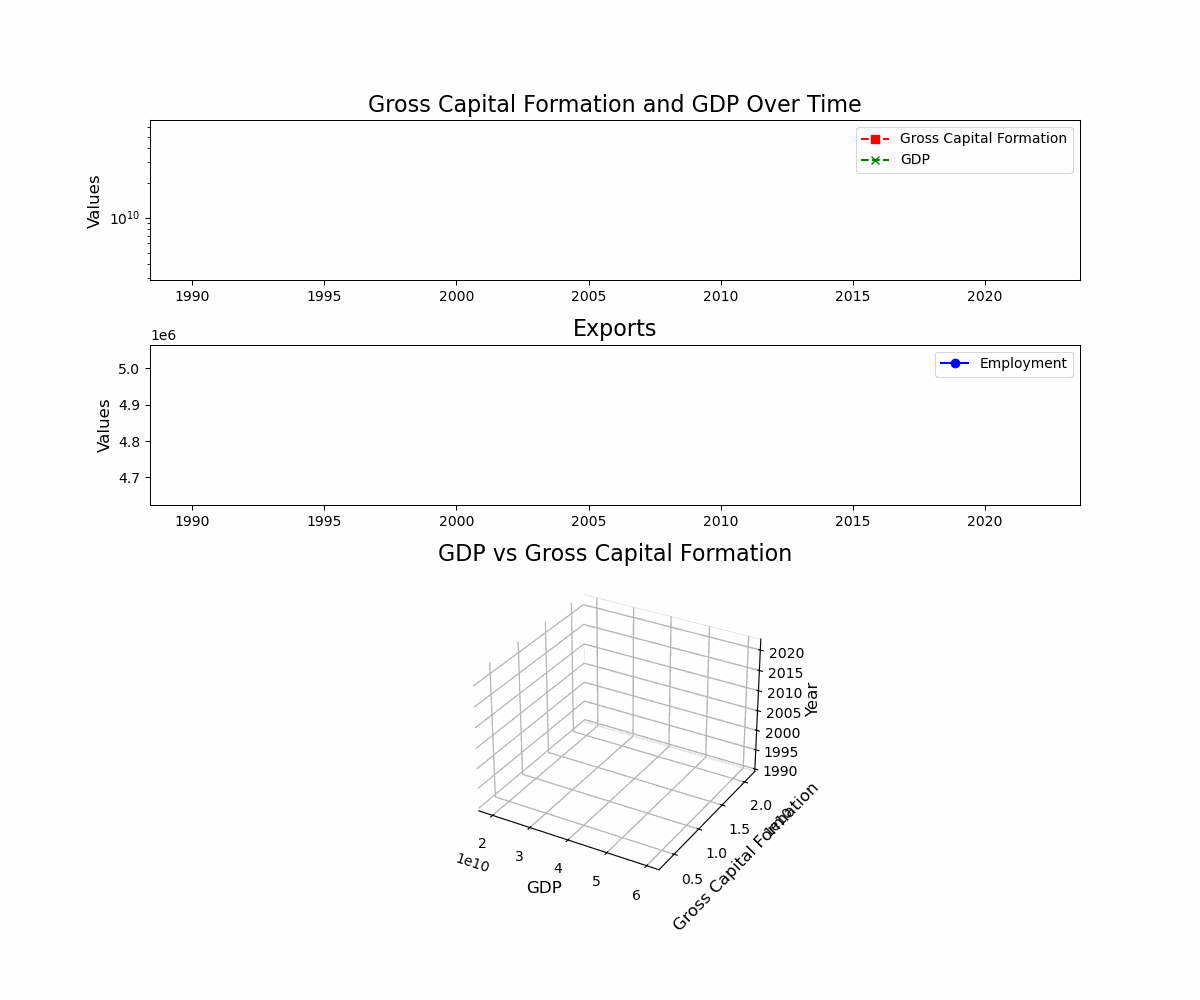

In [6]:
Image(Config.output_filename_first_anim)

## <div style="text-align: center;"> Cobb Douglas </div>

In our analysis, we will declare the following variables:

- **Output (GDP)**: This represents the Gross Domestic Product, which is a key economic indicator.
- **Capital**: Capital in this context refers to the labor force, an essential factor in economic production.
- **Labor**: Labor is defined as employment, representing the workforce actively engaged in economic activities.

In [25]:
Y = df['GDP']
K = df['Gross Capital Formation']
L = df['Total Employment']

### Cobb Douglas func

The Cobb Douglas is a fundamental concept in economics, which describes the evolution of an economy's output over time. The formula for the Cobb Douglas is expressed as:


$$ Y = A \cdot (K^a) \cdot (L^b) $$

In [12]:
Y_prime = np.log(Y)
K_prime = np.log(K)
L_prime = np.log(L)

$$ \ln(Y) = \ln(A) + a \cdot \ln(K) + b \cdot \ln(L) $$


In [13]:
X_prime = np.column_stack((K_prime, L_prime))
model = LinearRegression().fit(X_prime, Y_prime)

In [14]:
a, b = model.coef_
C = model.intercept_
A = np.exp(C)

print(f"A: {A}, a: {a}, b: {b}")

A: 7.539930738725303e-15, a: 0.5162831798889882, b: 2.9251868622890767


In [29]:
def CobbDouglas(K,L):
    return A * K**a * L**b

This formula helps us understand how factors such as capital accumulation, savings, and technological progress influence an economy's long-term growth and output.

 ## <div style="text-align: center;"> Characteristics </div>

In [32]:
df.loc[:, 'Labor_Productivity'] = df['GDP'] / df['Total Employment'] * b
df.loc[:, 'Capital_Productivity'] = df['GDP'] / df['Gross Capital Formation'] * a
df.loc[:, 'Labor_Elasticity'] = df['Labor_Productivity'].diff() / df['Labor_Productivity']
df.loc[:, 'Capital_Elasticity'] = df['Capital_Productivity'].diff() / df['Capital_Productivity']
df.loc[:, 'MRS'] = df['Labor_Productivity'].diff()  / df['Capital_Productivity'].diff()
df.loc[:, 'Elasticity_of_Substitution'] = df['MRS'].pct_change()

In [22]:
df

,GDP,Gross Capital Formation,Total Employment,Labor_Productivity,Capital_Productivity,Avg_Labor_Productivity,Avg_Capital_Productivity,Labor_Elasticity,Capital_Elasticity,MRS,Elasticity_of_Substitution
date,,,,,,,,,,,
2022,5.725185e+10,1.156466e+10,4833522.0,34648.101502,2.555905,34648.101502,2.555905,NaN,NaN,NaN,NaN
2021,6.007379e+10,1.401072e+10,4892246.0,35919.504191,2.213668,35919.504191,2.213668,0.035396,-1.546019e-01,-3.714975e+03,NaN
2020,5.864355e+10,1.489719e+10,4931564.0,34784.773837,2.032375,34784.773837,2.032375,-0.032621,-8.920222e-02,6.259118e+03,-2.684834
2019,5.904084e+10,1.589709e+10,4971033.0,34742.372603,1.917445,34742.372603,1.917445,-0.001220,-5.993929e-02,3.689300e+02,-0.941057
2018,5.819916e+10,1.497561e+10,4998649.0,34057.884274,2.006412,34057.884274,2.006412,-0.020098,4.434128e-02,-7.693743e+03,-21.854207
2017,5.642207e+10,1.459703e+10,5025143.0,32843.858177,1.995595,32843.858177,1.995595,-0.036964,-5.420413e-03,1.122337e+05,-15.587658
2016,5.502894e+10,1.383100e+10,5038419.0,31948.500336,2.054118,31948.500336,2.054118,-0.028025,2.849073e-02,-1.529916e+04,-1.136315
2015,5.645490e+10,1.617670e+10,5042141.0,32752.181529,1.801771,32752.181529,1.801771,0.024538,-1.400553e-01,-3.184819e+03,-0.791830
2014,5.870302e+10,1.913532e+10,5042125.0,34056.536044,1.583845,34056.536044,1.583845,0.038300,-1.375929e-01,-5.985314e+03,0.879326


In [33]:
df.loc[:, 'C_GDP'] = df.apply(lambda row: CobbDouglas(row['Gross Capital Formation'], row['Total Employment']), axis=1)
df['C_GDP']

date
2022    4.221958e+10
2021    4.829209e+10
2020    5.102709e+10
2019    5.401244e+10
2018    5.322835e+10
2017    5.334792e+10
2016    5.228567e+10
2015    5.681289e+10
2014    6.195887e+10
2013    6.397988e+10
2012    6.126814e+10
2011    6.514146e+10
2010    6.060951e+10
2009    5.518922e+10
2008    5.310800e+10
2007    4.685733e+10
2006    4.274133e+10
2005    3.672537e+10
2004    3.318809e+10
2003    2.990675e+10
2002    2.678417e+10
2001    2.537979e+10
2000    2.494816e+10
1999    2.380097e+10
1998    2.394502e+10
1997    2.270675e+10
1996    2.071794e+10
1995    2.110881e+10
1994    2.491685e+10
1993    2.648874e+10
1992    2.729132e+10
1991    3.006530e+10
1990    2.957810e+10
Name: C_GDP, dtype: float64

## <div style="text-align: center;"> Isoquants of the production function </div>

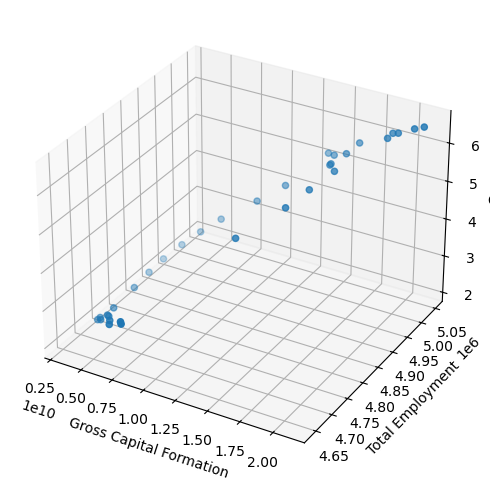

In [31]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Gross Capital Formation'], df['Total Employment'], df['C_GDP'])

ax.set_xlabel('Gross Capital Formation')
ax.set_ylabel('Total Employment')
ax.set_zlabel('GDP')

plt.show()